In [ ]:
Final Project - Level 1 Assignment

Student: Giovanna Melo Benites

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis

In [2]:
# Calculate VaR, Delta VaR, ES, and Delta Stress ES for given returns

def calculate_risk_metrics(returns, confidence_level=0.95, shift_percent=0.01):

    # Calculate the Value at Risk (VaR)
    var_level = 1 - confidence_level
    VaR = np.percentile(returns, var_level * 100)

    # Calculate the Expected Shortfall (ES)
    ES = returns[returns <= VaR].mean()  # ES (mean of returns below VaR)

    # Calculate shifted returns for Delta calculations
    shift = returns.std() * shift_percent
    shifted_returns = returns + shift

    # Delta VaR: Change in VaR when returns are shifted
    Delta_VaR = np.percentile(shifted_returns, var_level * 100) - VaR

    # Delta Stress ES: Change in ES when returns are shifted
    Delta_Stress_ES = shifted_returns[shifted_returns <= VaR + Delta_VaR].mean() - ES

    return {'VaR': VaR, 'Delta VaR': Delta_VaR, 'ES': ES, 'Delta Stress ES': Delta_Stress_ES}

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed




Risk Metrics: {'VaR': -0.017299221443549388, 'Delta VaR': 0.00010913594360358742, 'ES': -0.025447935328043486, 'Delta Stress ES': 0.00010913594360358395}


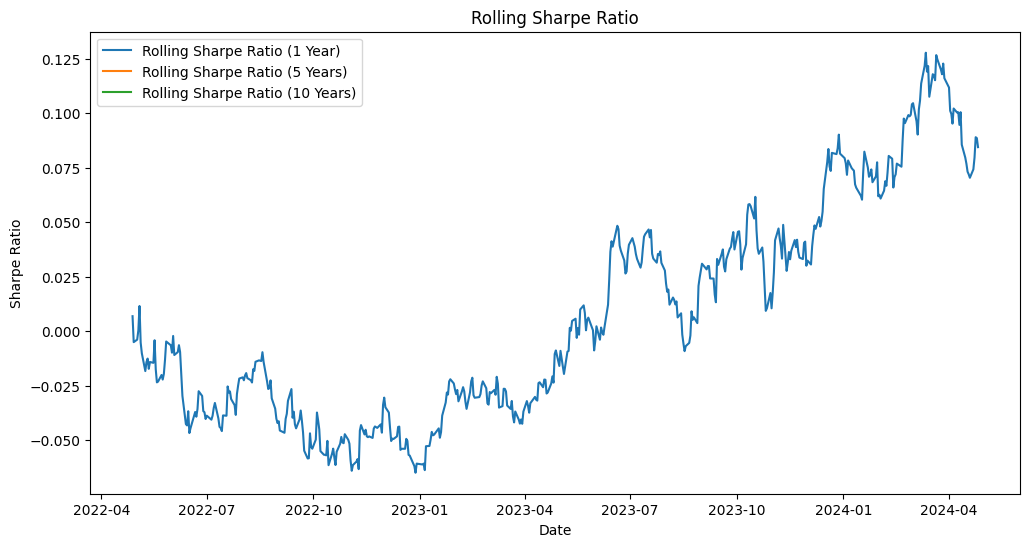

In [3]:
# Testing the function with real data for S&P 500 Futures
ticker = 'ES=F'
data = yf.download(ticker, start="2021-04-29", end="2024-04-29")['Adj Close']

# Calculate daily log returns
log_returns = np.log(data / data.shift(1)).dropna()

# Fetch risk-free rate data and align with the returns index
start_date = log_returns.index[0]
risk_free_rate = (yf.download('^IRX', start=start_date)['Adj Close'] / 100) / 252
risk_free_rate = risk_free_rate.reindex(log_returns.index, method='ffill')

# Calculate excess returns by subtracting the risk-free rate from log returns
excess_returns = log_returns - risk_free_rate

# Calculate risk metrics
risk_metrics = calculate_risk_metrics(excess_returns)
print()
print()
print("Risk Metrics:", risk_metrics)

# Plotting rolling Sharpe Ratio
plt.figure(figsize=(12, 6))

# Rolling Sharpe Ratio for 1-year window (252 trading days)
plt.plot(excess_returns.rolling(252).mean() / log_returns.rolling(252).std(), label='Rolling Sharpe Ratio (1 Year)')

# Rolling Sharpe Ratio for 5-year window (252*5 trading days)
plt.plot(excess_returns.rolling(252*5).mean() / log_returns.rolling(252).std(), label='Rolling Sharpe Ratio (5 Years)')

# Rolling Sharpe Ratio for 10-year window (252*10 trading days)
plt.plot(excess_returns.rolling(252*10).mean() / log_returns.rolling(252).std(), label='Rolling Sharpe Ratio (10 Years)')

plt.title('Rolling Sharpe Ratio')
plt.xlabel('Date')
plt.ylabel('Sharpe Ratio')
plt.legend()
plt.show()

In [5]:
# Testing the function with real data for 10-Year Treasury Futures
ticker = 'ZN=F'
data = yf.download(ticker, start="2021-04-29", end="2024-04-29")['Adj Close']

# Calculate daily log returns
log_returns = np.log(data / data.shift(1)).dropna()

# Fetch risk-free rate data and align with the returns index
risk_free_rate = (yf.download('^IRX', start=start_date)['Adj Close'] / 100) / 252
risk_free_rate = risk_free_rate.reindex(log_returns.index, method='ffill')

# Calculate excess returns
excess_returns = log_returns - risk_free_rate

# Calculate Sharpe Ratio
annualized_mean_excess_return = excess_returns.mean() * 252
annual_vol = log_returns.std() * np.sqrt(252)
sharpe_ratio = annualized_mean_excess_return / annual_vol

print()
print()
print("Sharpe Ratio for 10-Year Treasury Futures:", sharpe_ratio)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed



Sharpe Ratio for 10-Year Treasury Futures: -1.374166364535431


In [6]:
# Portfolio construction with S&P 500 and 10-Year Treasury Futures
tickers = ('ES=F', 'ZN=F')
prices = yf.download(tickers)['Adj Close'].ffill()

# Calculate log returns and cumulative returns
returns = np.log(prices / prices.shift(1)).dropna()
cum_sp500_returns = np.exp(returns['ES=F'].cumsum()) - 1
cum_treasuries_returns = np.exp(returns['ZN=F'].cumsum()) - 1

# Define portfolio weights and calculate portfolio returns
weights = [0.6, 0.4]
weighted_returns = returns * weights
portfolio_returns = weighted_returns.sum(axis=1)
cum_portfolio_returns = np.exp(portfolio_returns.cumsum()) - 1

# Calculate risk metrics for the portfolio
annualized_mean_portfolio_return = portfolio_returns.mean() * 252
annualized_vol = portfolio_returns.std() * np.sqrt(252)
portfolio_skewness = skew(portfolio_returns)
portfolio_kurtosis = kurtosis(portfolio_returns, fisher=True)
portfolio_ongoing_drawdown = cum_portfolio_returns.cummax() - cum_portfolio_returns
max_portfolio_drawdown = portfolio_ongoing_drawdown.max()

# Fetch and align risk-free rate data for portfolio
risk_free_rate = yf.download('^IRX', start=start_date)['Adj Close'] / 100
risk_free_rate_daily = risk_free_rate / 252
risk_free_rate_aligned = risk_free_rate_daily.reindex(portfolio_returns.index).ffill()
annualized_risk_free_rate = risk_free_rate_aligned.mean() * 252

# Calculate Sharpe Ratio for the portfolio
annualized_mean_excess_return = annualized_mean_portfolio_return - annualized_risk_free_rate
sharpe_ratio = annualized_mean_excess_return / annualized_vol

print()
print()
print("PORTFOLIO MEASURES OF RETURN AND RISK")
print("Annualized Mean Portfolio Return:", annualized_mean_portfolio_return)
print("Annualized Portfolio Volatility:", annualized_vol)
print("Portfolio Skewness:", portfolio_skewness)
print("Portfolio Kurtosis:", portfolio_kurtosis)
print("Portfolio Max Drawdown:", max_portfolio_drawdown)
print("Sharpe Ratio:", sharpe_ratio)

[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  1 of 1 completed



PORTFOLIO MEASURES OF RETURN AND RISK
Annualized Mean Portfolio Return: 0.03540676976637963
Annualized Portfolio Volatility: 0.11323802852184957
Portfolio Skewness: -0.27693909838454833
Portfolio Kurtosis: 11.632053006086977
Portfolio Max Drawdown: 0.4769898438534057
Sharpe Ratio: nan


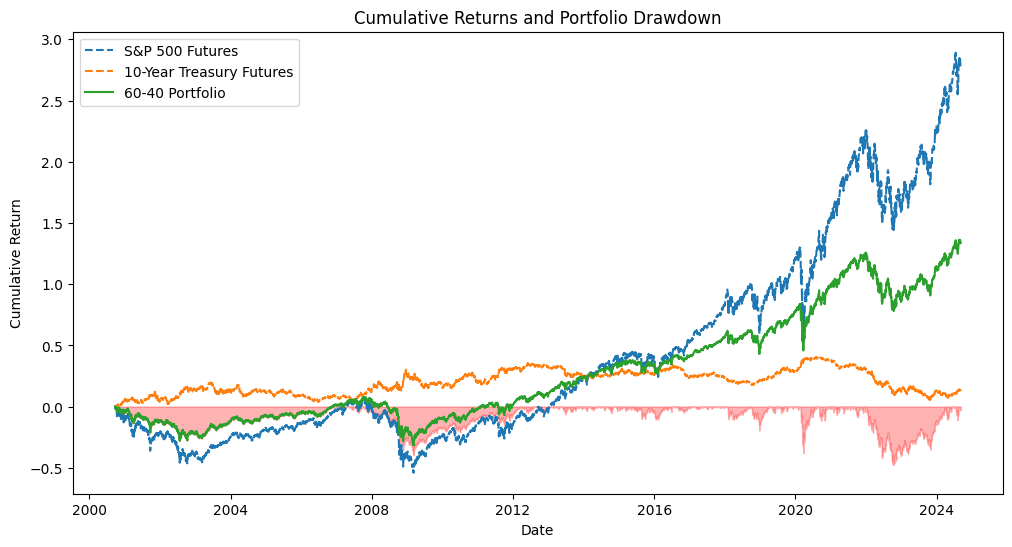

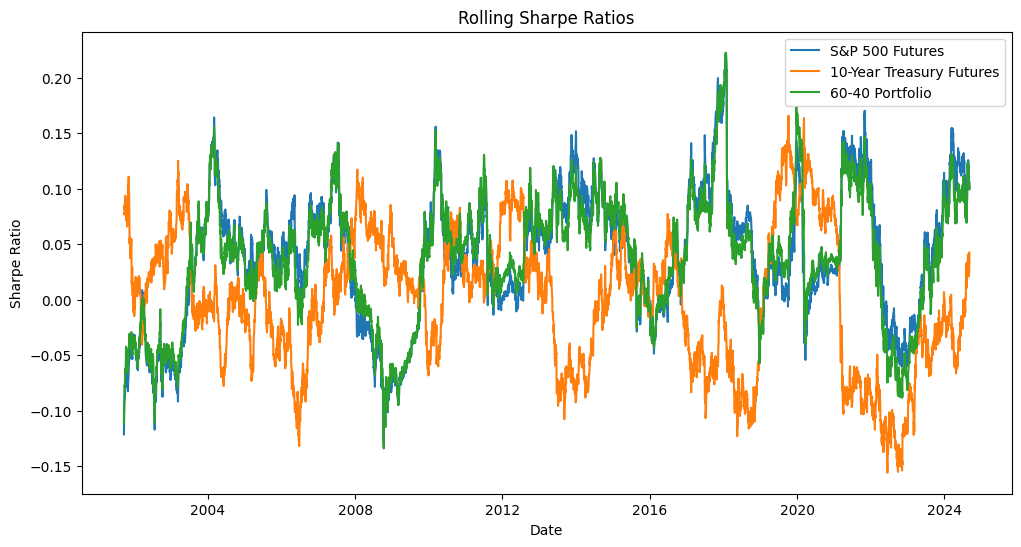

In [7]:

# Plot cumulative returns and drawdowns
plt.figure(figsize=(12, 6))

plt.plot(cum_sp500_returns, label='S&P 500 Futures', linestyle='dashed')
plt.plot(cum_treasuries_returns, label='10-Year Treasury Futures', linestyle='dashed')
plt.plot(cum_portfolio_returns, label='60-40 Portfolio', linewidth=1.5)
plt.fill_between(portfolio_ongoing_drawdown.index, -portfolio_ongoing_drawdown, color='red', alpha=0.3)

plt.title('Cumulative Returns and Portfolio Drawdown')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()

# Calculate and plot rolling Sharpe Ratios for the portfolio and assets
window = 252
plt.figure(figsize=(12, 6))
plt.plot(returns['ES=F'].rolling(window).mean() / returns['ES=F'].rolling(window).std(), label='S&P 500 Futures')
plt.plot(returns['ZN=F'].rolling(window).mean() / returns['ZN=F'].rolling(window).std(), label='10-Year Treasury Futures')
plt.plot(portfolio_returns.rolling(window).mean() / portfolio_returns.rolling(window).std(), label='60-40 Portfolio')

plt.title('Rolling Sharpe Ratios')
plt.xlabel('Date')
plt.ylabel('Sharpe Ratio')
plt.legend()
plt.show()


In [ ]:

# Fetch inflation data and calculate inflation-adjusted Sharpe Ratio
import pandas_datareader as pdr

# Specify the series ID for the Consumer Price Index (CPI)
series_id = 'CPIAUCSL'
start_date = '1999-09-22'

# Fetch the inflation data
inflation_data = pdr.get_data_fred(series_id, start_date)

# Calculate monthly inflation rate and resample to daily frequency
inflation_rate = inflation_data['CPIAUCSL'].pct_change(periods=12).resample('D').ffill().dropna()

# Calculate inflation-adjusted Sharpe Ratio
excess_return = annualized_mean_portfolio_return - inflation_rate.mean()
inflation_adjusted_sharpe_ratio = excess_return / annualized_vol

print('Inflation Adjusted Sharpe Ratio:', inflation_adjusted_sharpe_ratio)